In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
import matplotlib.pyplot as plt

In [3]:
os.chdir('C:/Users/Soham/Downloads/house-prices-advanced-regression-techniques')
training_data = pd.read_csv("train.csv")
testing_data = pd.read_csv("test.csv")

In [6]:
Input_to_learn = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
Output_to_learn = ['SalePrice']

In [8]:
print(training_data[Input_to_learn ].isnull().sum())

GrLivArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
dtype: int64


In [10]:
X = training_data[Input_to_learn ]
y = training_data[Output_to_learn]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)


In [14]:
rmsle = np.sqrt(mean_squared_log_error(y_val, np.maximum(y_pred, 0)))
print("Validation RMSLE:", rmsle)

Validation RMSLE: 0.27283096292144704


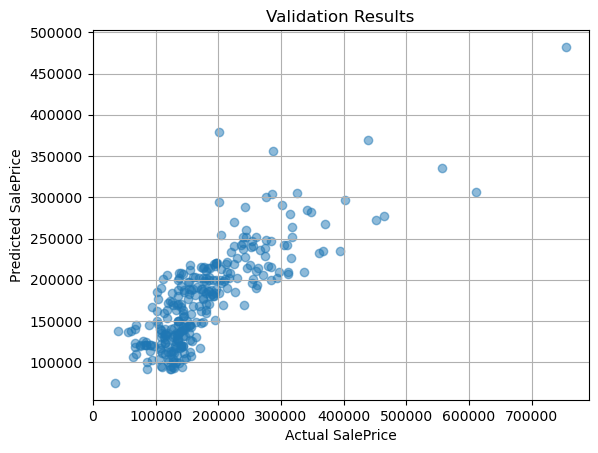

In [16]:
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Validation Results")
plt.grid(True)
plt.show()

In [18]:
test_X = testing_data[Input_to_learn]

test_X = test_X.fillna(test_X.mean())

test_preds = model.predict(test_X)
test_preds = np.ravel(test_preds) 

In [20]:
submission = pd.DataFrame({
    'Id': testing_data['Id'],
    'SalePrice': test_preds
})

submission.to_csv(r"C:\Users\Soham\Desktop\Soham\Practices\Submission\submission.csv", index=False)
print("File saved at: C:\\Users\\Soham\\Desktop\\Soham\\Practices\\Submission\\submission.csv")


File saved at: C:\Users\Soham\Desktop\Soham\Practices\Submission\submission.csv
